Tugas ini berupa mini project yang diselesaikan diakhir pertemuan bulan pertama. Tugas disusun sesuai dengan materi yang diberikan tiap harinya di pekan 4. 

# Dataset

silahkan unduh dataset berikut untuk mengerjakan tugas pekan 4:

[pelanggan_supermarket.csv](https://drive.google.com/uc?export=download&id=1jaxCbZ4fcCneeVCEN-yuxWE0RyX25tbQ)



---



---



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load data dari csv
df = pd.read_csv('pelanggan_supermarket.csv')
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0




---



---



---



# Soal 1. Statistika Deskriptif

Lakukan eksplorasi data dengan menggunakan statistika deskriptif. Gunakan pandas untuk mendapatkan summary statistics, dan analisa hasil yang ditampilkan.

In [3]:
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


**Expected output**

![](https://drive.google.com/uc?id=1-5_d0Ey1lWMXj0d8ABimuPqqTz-h-8mx)



---



---



---



# Soal 2. Handling missing value

Jika dilihat dari summary statistik terlihat dataset memiliki nilai missing. Hitunglah jumlah missing value menggunakan methode .isnull(). 

Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

Cek keberadaan missing value sebelum imputasi

In [4]:
print(df.isna().sum())

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64


isi nilai nan dengan menggunakan metode 'ffill' 

In [5]:
fill_df = df.fillna(method='ffill')
display(fill_df)

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


Cek kembali keberadaan missing value setelah imputasi

In [6]:
print(fill_df.isnull().sum())

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64




---



---



---



# Soal 3. Handling outlier

1. Apakah data set memiliki nilai pencilan untuk setiap kolom? periksalah dengan melakukan visualisasi menggunakan boxplot.
2. Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)
3. Teknik ini akan menghasilkan nilai missing pada nilai outlier yang telah dihapus, maka hapuslah data missing tersebut dengan menggunakan method .dropna()

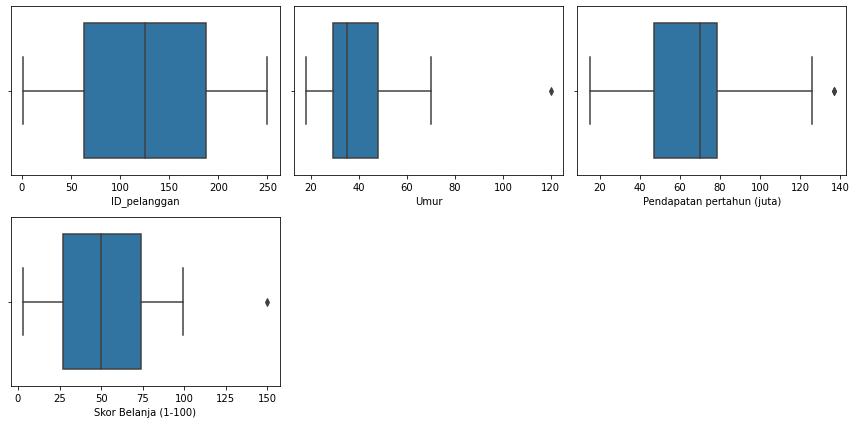

In [7]:
#Tampilkan Boxplot masing-masing kolom berisi data kuantitatif sebelum handling outlier
#Jenis plot yang digunakan adalah boxplot seaborn
plt.figure(figsize=(12,6))

for i, col in enumerate(fill_df.describe().columns):
    plt.subplot(2,3, i+1)
    sns.boxplot(x=fill_df[col])
    plt.tight_layout()

plt.show()

In [8]:
#Hilangkan Outlier dan tampilkan dataframe hasil menghilangkan outliernya

def get_Outliers_index(dframe):
    
    outliers_index = []
    for col in dframe.describe().columns:
        Q1 = dframe[col].quantile(0.25)
        Q3 = dframe[col].quantile(0.75)
    
        IQR = Q3-Q1
    
        lower_limit = Q1-(1.5*IQR)
        upper_limit = Q3+(1.5*IQR)
    
        outliers = dframe[ (dframe[col]<lower_limit) | (dframe[col]>upper_limit) ].index
        outliers_index.extend(outliers.to_list())
    
    outliers_index = set(outliers_index)  #Convert to set to remove duplicate numbers
    outliers_index = list(outliers_index) #Convert the set back to list
    
    outliers_index.sort()                 #Sort the list
    
    return outliers_index

In [9]:
get_Outliers_index(fill_df)

[16, 198, 199, 249]

In [10]:
outlier_id = get_Outliers_index(fill_df)

fill_df.drop(outlier_id, inplace=True)

In [11]:
new_outlier = fill_df.drop(['Jenis Kelamin','ID_pelanggan'], axis = 1)
display(new_outlier)

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,19.0,15,39.0
1,21.0,15,81.0
2,20.0,16,6.0
3,23.0,16,77.0
4,31.0,17,40.0
...,...,...,...
244,27.0,88,69.0
245,59.0,93,14.0
246,35.0,93,90.0
247,37.0,97,32.0


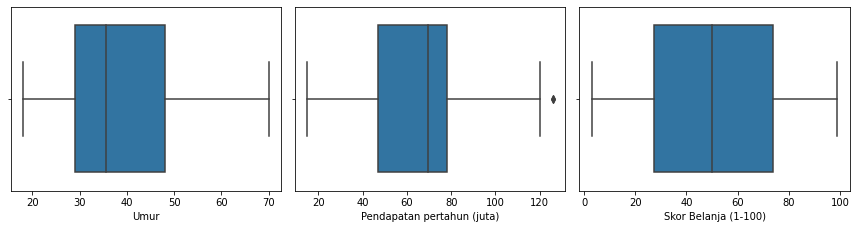

In [12]:
#Tampilkan Boxplot masing-masing kolom berisi data kuantitatif sesudah handling outlier
#Kolom ID Pelanggan tidak ikut ditampilkan

plt.figure(figsize=(12,6))

for i, j in enumerate(new_outlier.describe().columns):
    plt.subplot(2,3, i+1)
    sns.boxplot(x=new_outlier[j])
    plt.tight_layout()
    
plt.show()

**Expected output**

- **Melihat adanya pencilan menggunakan Boxplot (Sebelum hapus outlier):**

![](https://drive.google.com/uc?id=1ettD4G8xBMCYcMUVt88kn5k_yCufgdyf)

- **Data frame setelah menghapus outlier:**

![](https://puu.sh/IIOxx/b0d9c3d73e.png)

- **Melihat adanya pencilan menggunakan Boxplot (Setelah hapus outlier):**
![](https://puu.sh/IIOA5/de25854dfa.png)



---



---



---



# Soal 4. statistika Inferential



*   Kita akan melakukan hipotesis terhadap 100 sample pengunjung Supermarket. Hipotesis awal adalah rata2 usia pengunjung supermarket adalah 35 tahun. Ujilah hipotesis tersebut dengan menggunakan teknik probabilitas p-value)!
*   Level significat value acuan (disebut juga level alpha) adalah 5%
*   Gunakan variabel dataframe **hasil handling missing value dan outlier dari soal sebelumnya**
*   Berikan uraian analisis uji hipotesis menggunakan teknik p-value (untuk mendapatkan nilai p-value, silahkan gunakan fungsi **"ztest"** dari library **statsmodels.stats.weightstats**)
*   Untuk mempermudah perhitungan, ubahlah tipe data kolom Umur menjadi int dengan menggunakan methode .astype() baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html





In [13]:
#Lakukan sampling
#Isi bagian yang kosong dengan nama dataframe tempat anda menyimpan hasil no. 3

df_100 = new_outlier.sample(100,  random_state=1)
display(df_100)

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
68,19.0,48,59.0
248,32.0,97,86.0
211,25.0,77,12.0
225,30.0,78,4.0
91,18.0,59,41.0
...,...,...,...
5,22.0,17,76.0
184,41.0,99,39.0
186,54.0,101,24.0
49,31.0,40,42.0


In [14]:
#Ubah value kolom Umur dari float menjadi integer

umur_int = df_100.astype({'Umur': 'int32'})
umur_int

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
68,19,48,59.0
248,32,97,86.0
211,25,77,12.0
225,30,78,4.0
91,18,59,41.0
...,...,...,...
5,22,17,76.0
184,41,99,39.0
186,54,101,24.0
49,31,40,42.0


In [15]:
# menggunakan teknik p-value
# Isi bagian yang kosong

import statsmodels

from statsmodels.stats.weightstats import ztest

z_test, p_value = ztest(x1 = umur_int['Umur'], value = 35)

#print the Results
print(f'Z-test is :{z_test}')
print(f'p-value is :{p_value}')

Z-test is :2.4874107887154624
p-value is :0.012867672183696988


**Expected Output:**

Z-Test is: 2.48741...
<br>P-value is: 0.01286767...

<br>\[Uraian analisis berdasarkan p-value\]



---



---



---



## Soal 5. EDA

### 5.a. Univariate Analysis

Lakukan eksplorasi data analisis. Gunakan visualisasi distplot untuk melihat sebaran data dan histogram pada setiap kolom **dataset awal sebelum dilakukan handling missing value maupun outlier**.
<br><br>
Jenis plot yang digunakan adalah distplot seaborn

In [16]:
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


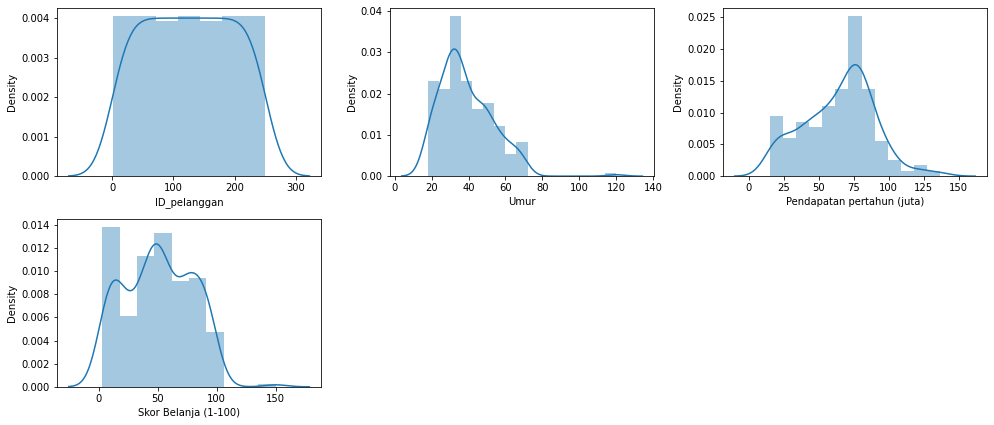

In [17]:
#Tampilkan Boxplot masing-masing kolom berisi data kuantitatif sebelum handling outlier
#Jenis plot yang digunakan adalah boxplot seaborn
plt.figure(figsize=(14,6))

for i, col in enumerate(df.describe().columns):
    plt.subplot(2,3, i+1)
    sns.distplot(x=df[col])
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

**Expected Output:**

![](https://puu.sh/IIOGG/54e31ca7e0.png)

\[Uraian analisis berdasarkan output grafik analisis univariat yang didapat\]

---

### 5.b. Bivariate Analysis

Lakukan eksplorasi data analisis. Gunakan visualisasi barplot untuk melihat perbandingan skor belanja antara pengunjung perempuan dengan pengunjung lai-laki pada dataset awal **sebelum dilakukan handling missing value maupun outlier**

#### > Sort dataframe berdasarkan Skor Belanja, dari besar ke kecil


In [18]:
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


In [19]:
skor = df.sort_values(by=['Skor Belanja (1-100)'], ascending=False)

#### > Tampilkan 5 data teratasnya

In [20]:
skor.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
16,17,Perempuan,35.0,21,150.0
11,12,Perempuan,35.0,19,99.0
19,20,Perempuan,35.0,23,98.0
185,186,Laki-laki,30.0,99,97.0
145,146,Laki-laki,28.0,77,97.0


#### > Tampilkan 5 data terbawahnya

In [21]:
skor.tail()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
8,9,Laki-laki,64.0,19,3.0
49,50,Perempuan,31.0,40,NaN
61,62,Laki-laki,19.0,46,NaN
94,95,Perempuan,32.0,60,NaN
117,118,Perempuan,49.0,65,NaN


#### > Buat grafiknya menggunakan barplot seaborn

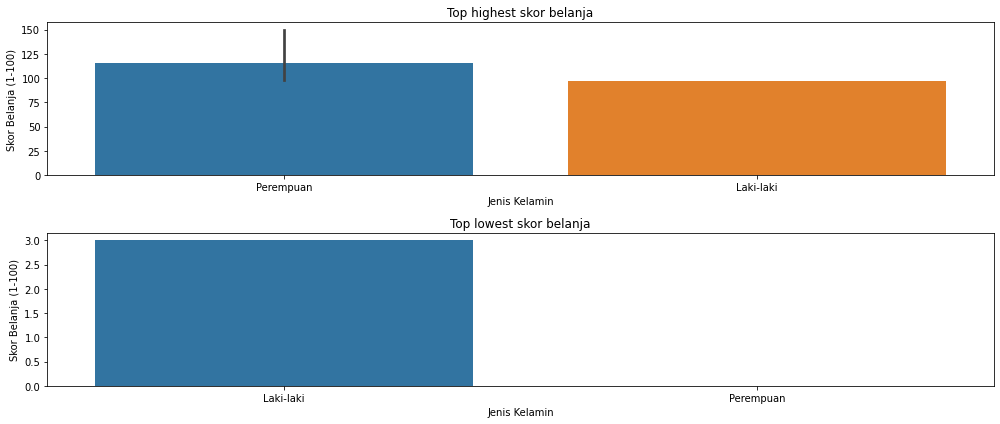

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(14,6))
sns.barplot(data=skor.head(), y='Skor Belanja (1-100)', x='Jenis Kelamin', ax=axes[0]).set(title='Top highest skor belanja')
sns.barplot(data=skor.tail(), y='Skor Belanja (1-100)', x='Jenis Kelamin', ax=axes[1]).set(title='Top lowest skor belanja')
plt.tight_layout()

**Expected output:**

![](https://puu.sh/IIOLu/8c1c76b5e4.png)

\[Uraian analisis dari grafik bivariat yang didapat\]

---

### 5.c. Multivariate Analysis

Lakukan eksplorasi data analisis. Gunakan visualisasi heatmap sebagai multivariate analisis untuk melihat korelasi tertinggi dari setiap data pada dataset awal **sebelum dilakukan handling missing value maupun outlier**

Plot menggunakan heatmap seaborn.

In [23]:
data3 = df.loc[:, df.columns != 'Jenis Kelamin']

<AxesSubplot:>

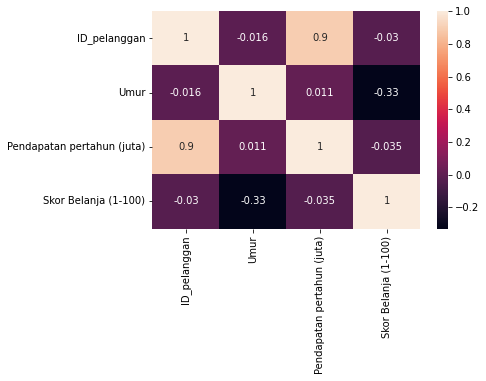

In [24]:
#Isi bagian yang kosong

sns.heatmap(df.corr(), annot=True, fmt='.2g')

**Expected Output:**

![](https://puu.sh/IIOQG/57c5ba3219.png)

\[Uraian analisis dari grafik multivariat yang didapat\]



---

---



---





# Soal 6
lakukan scaling data dengan menggunakan standarisasi untuk kolom Umur dan skor belanja saja tetapi **menggunakan variabel dataframe setelah handling missing value dan outlier**

In [25]:
#feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

output = scaler.fit_transform(new_outlier[['Umur','Skor Belanja (1-100)']])

array([[-1.45540807e+00, -3.96862497e-01],
       [-1.30503831e+00,  1.12123573e+00],
       [-1.38022319e+00, -1.58965396e+00],
       [-1.15466856e+00,  9.76654949e-01],
       [-5.53189542e-01, -3.60717301e-01],
       [-1.22985343e+00,  9.40509753e-01],
       [-2.52450034e-01, -1.58965396e+00],
       [-1.15466856e+00,  1.59112328e+00],
       [ 1.92791140e+00, -1.69808955e+00],
       [-6.28374419e-01,  7.95928969e-01],
       [ 2.15346603e+00, -1.30049240e+00],
       [-2.52450034e-01,  1.77184926e+00],
       [ 1.47680214e+00, -1.26434720e+00],
       [-1.07948368e+00,  9.76654949e-01],
       [-1.02080280e-01, -1.33663759e+00],
       [-1.22985343e+00,  1.04894534e+00],
       [-1.38022319e+00,  5.79057793e-01],
       [ 1.02569287e+00, -7.58314456e-01],
       [-2.52450034e-01,  1.73570406e+00],
       [-2.52450034e-01, -5.41443281e-01],
       [-1.00429880e+00,  8.32074165e-01],
       [ 5.74583613e-01, -1.62579916e+00],
       [-5.53189542e-01,  8.32074165e-01],
       [ 1.

**Expected Output (Hasil yang ditampilkan hanya sebagian):**

![](https://puu.sh/IIOZx/c4bae0561e.png)



---



---



---



# Soal 7

*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

In [71]:
output_df = pd.DataFrame(output)
output_df

,0,1
0,-1.455408,-0.396862
1,-1.305038,1.121236
2,-1.380223,-1.589654
3,-1.154669,0.976655
4,-0.553190,-0.360717
...,...,...
241,-0.853929,0.687493
242,1.551987,-1.300492
243,-0.252450,1.446542
244,-0.102080,-0.649879


In [129]:
#clustering n=2
from sklearn.cluster import KMeans

k=2

model = KMeans(n_clusters=k)
predict = model.fit(output_df)
predict

KMeans(n_clusters=2)

In [91]:
label= model.fit_predict(output_df)
print(label)

[0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1
 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0
 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [130]:
filtered_label0 = output_df[label == 0]
filtered_label1 = output_df[label == 1]

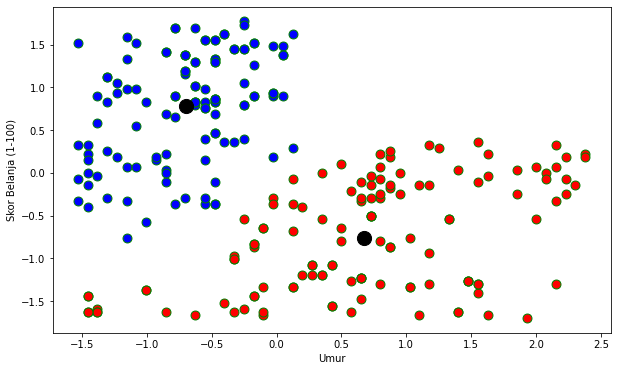

In [141]:
#visualisasi n=2 beserta centroid-centroidnya

fig, ax = plt.subplots(figsize=(10,6))

centers = model.cluster_centers_

plt.scatter(filtered_label0[0] , filtered_label0[1], s=80, c='blue', marker ="o", edgecolor ="green")
plt.scatter(filtered_label1[0] , filtered_label1[1], s=80, c='red', marker ="o", edgecolor ="green")

plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200);

ax.set_ylabel('Skor Belanja (1-100)')
ax.set_xlabel('Umur')

plt.show()

In [ ]:
#elbow method beserta visualisasinya

plt.scatter()

In [145]:
#clustering n=3

from sklearn.cluster import KMeans

k=3

model2 = KMeans(n_clusters=k)
predict2 = model2.fit(output_df)
predict2

KMeans(n_clusters=3)

In [149]:
label2 = model2.fit_predict(output_df)
label2

array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1,
       2, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 2, 0])

In [154]:
filtered_label0 = output_df[label2 == 0]
filtered_label1 = output_df[label2 == 1]
filtered_label2 = output_df[label2 == 2]

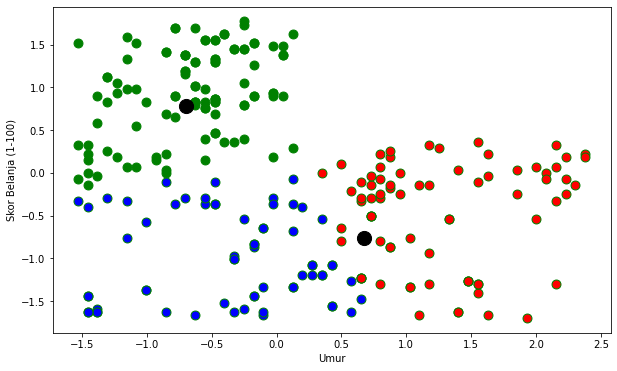

In [168]:
#visualisasi n=3 beserta centroid-centroidnya

fig, ax = plt.subplots(figsize=(10,6))

centers = model.cluster_centers_

plt.scatter(filtered_label0[0] , filtered_label0[1], s=80, c='green', marker ="o", edgecolor ="green")
plt.scatter(filtered_label1[0] , filtered_label1[1], s=80, c='red', marker ="o", edgecolor ="green")
plt.scatter(filtered_label2[0] , filtered_label2[1], s=80, c='blue', marker ="o", edgecolor ="green")

plt.scatter(centers[:,0], centers[:,1], c = 'black', s = 200);

ax.set_ylabel('Skor Belanja (1-100)')
ax.set_xlabel('Umur')

plt.show()

In [ ]:
#tampilan silhoutte score untuk n=2 dan n=3
from sklearn.metrics import silhouette_score


**Expected output**

cluster 2

![](https://drive.google.com/uc?id=1L7nIskGXbeXGhKOzhMWCykJ4jY5538mn)

elbow method

![](https://drive.google.com/uc?id=1a3OL9FhiQ2-DyJQ8sg8PNzfS9QsszyvU)

cluster 3

![](https://drive.google.com/uc?id=1UR6vK36oLJinLPtechjJJBtxifmdFOSn)

---
---
---

## Soal 8. Analyze clustering result

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk targetted market supermarket.
Langkah-langkah:

* Buatlah dataframe hasil inverse scaling dari hasil pengerjaan no. 6
* Masukkan label hasil clustering K=3 ke data frame baru ini.
* Tampilkan kembali scatterplot berdasarkan data frame baru ini
* Buatlah uraian analisa dari grafik tersebut
* Berikan rekomendasi kepada manajemen supermarket tersebut untuk meningkatkan penjualan

In [ ]:
#Inverse transform hasil pengerjaan no. 6 kemudian jadikanlah dataframe
inv_scaled = ______

new_df1 = pd.DataFrame(data=____,
                       columns=____)

new_df1['label_k3'] = ____
new_df1

In [ ]:
#Tampilkan dalam scatterplot


\[Tulis uraian analisis grafik yang sudah anda buat di sini\]

**Expected Output:**

* Dataframe hasil inverse scaling (hasil urutan nomor label mungkin berbeda, tapi tetap terdiri dari 0, 1, dan 2) <br>
![](https://puu.sh/IN3jl/3d2c66f2de.png)

* Grafik dari data frame tersebut, warna boleh berbeda, tapi perhatikan angka pada sumbu x dan y: <br>
![](https://puu.sh/IIPUx/d953c4760f.png)

* Uraian analisis & rekomendasi
<br>\[Tulis apa informasi yang kalian dapat dari grafik tersebut dan sertakan rekomendasi kalian untuk meningkatkan penjualan supermarket ini\]